In [0]:
import pandas as pd
import numpy as np

# libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import xgboost as xg
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
# import tensorflow as tf
# import tensorflow_data_validation as tfdv
from sklearn.model_selection import train_test_split

In [0]:
df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("/mnt/projectteam6/Project_Team6/total_bank_data.csv")

In [0]:
df_failed_bank = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("/mnt/projectteam6/Project_Team6/Failed_Bank_Dataset_2.csv")

In [0]:
df.head()

Row(ABCUBKR=0.0, ABCUOTHR=0.0, ABCXBKR=0.0, ABCXOTHR=0.0, ADDNONINTEXPQR=0.8965429449526269, ADDNONINTEXPR=0.8515585561238279, ALLOTHLR=0.3635344227308489, ASCEOTHR=0.0, ASCERESR=0.0, ASDROTHR=0.0, ASDRRESR=0.0, ASSTLTR=31.232309347898823, AVASSETJR=99.61611850137004, BKPREMR=0.5859957858945027, BROINSR=8.472974561633553, BROR=8.472974561633553, CBLRIND=0.0, CBLRINDQ=None, CD1T3R=0.2387390238829455, CD1T3SR=6.801801394452935, CD3LESR=0.0, CD3LESSR=4.298206744377424, CD3T12R=1.3537587831544298, CD3T12SR=11.713133359257014, CDOV3R=0.0, CDOV3SR=0.528571816134779, CERT=10004, CHBALIR=0.733851204094736, CHBALNIR=1.7435183259330265, CHBALR=2.4773695300277625, CHCICR=0.0, CHCOINR=0.0, CHFRBR=0.0, CHITEMR=0.0, CHUSR=0.0, COREDEPR=70.9719572078386, CRAGQR=0.0, CRAGR=0.0, CRAGSMQR=0.0, CRAGSMR=0.0, CRAUTOQR=0.0, CRAUTOR=0.0, CRCINUSQR=0.0, CRCINUSR=0.0, CRCIQR=0.0, CRCIR=0.0, CRCONOTHR=0.0, CRCONOTQR=0.0, CRCONQR=0.0, CRCONR=0.0, CRCRCDQR=0.0, CRCRCDR=0.0, CRDEPNUQR=0.0, CRDEPNUSR=0.0, CRDEPQR=0

In [0]:
zero_percentage = (df == 0).mean()

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
File <command-1992370708662683>, line 1
----> 1 zero_percentage = (df == 0).mean()

AttributeError: 'bool' object has no attribute 'mean'

In [0]:
selected_columns = zero_percentage[zero_percentage < 0.9].index

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1992370708662684>, line 1
----> 1 selected_columns = zero_percentage[zero_percentage < 0.9].index

NameError: name 'zero_percentage' is not defined

In [0]:
df_clean = df[selected_columns]

In [0]:
import pandas as pd

df_clean = pd.read_csv("/mnt/projectteam6/Project_Team6/Failed_Bank_Dataset_2.csv")

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
File <command-1992370708662686>, line 3
      1 import pandas as pd
----> 3 df_clean = pd.read_csv("/mnt/projectteam6/Project_Team6/Failed_Bank_Dataset_2.csv")

File /databricks/python/lib/python3.10/site-packages/pandas/util/_decorators.py:311, in deprecate_nonkeyword_arguments.<locals>.decorate.<locals>.wrapper(*args, **kwargs)
    305 if len(args) > num_allow_args:
    306     warnings.warn(
    307         msg.format(arguments=arguments),
    308         FutureWarning,
    309         stacklevel=stacklevel,
    310     )
--> 311 return func(*args, **kwargs)

File /databricks/python/lib/python3.10/site-packages/pandas/io/parsers/readers.py:678, in read_csv(filepath_or_buffer, sep, delimiter, header, names, index_col, usecols, squeeze, prefix, mangle_dupe_cols, dtype, engine, converters, true_values, false_values, skipinitialspace, sk

In [0]:
merged_df = pd.merge(df_clean, df_failed_bank[['Closing_Date','Cert']], left_on='CERT', right_on='Cert', how='left')

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File <command-1992370708662687>, line 1
----> 1 merged_df = pd.merge(df_clean, df_failed_bank[['Closing_Date','Cert']], left_on='CERT', right_on='Cert', how='left')

File /databricks/python/lib/python3.10/site-packages/pandas/core/reshape/merge.py:107, in merge(left, right, how, on, left_on, right_on, left_index, right_index, sort, suffixes, copy, indicator, validate)
     90 @Substitution("\nleft : DataFrame or named Series")
     91 @Appender(_merge_doc, indents=0)
     92 def merge(
   (...)
    105     validate: str | None = None,
    106 ) -> DataFrame:
--> 107     op = _MergeOperation(
    108         left,
    109         right,
    110         how=how,
    111         on=on,
    112         left_on=left_on,
    113         right_on=right_on,
    114         left_index=left_index,
    115         right_index=right_index,
    116 

In [0]:
merged_df.sort_values(by='REPDTE', inplace=True)

In [0]:
merged_df = merged_df.reset_index(drop=True)

In [0]:
merged_df['REPDTE'] = pd.to_datetime(merged_df['REPDTE'], format='%Y%m%d')

In [0]:
merged_df['Closing_Date'] = pd.to_datetime(merged_df['Closing_Date'])

In [0]:
merged_df['FailWithin90Days'] = ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days >= 0) & ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days <= 90)
merged_df['FailWithin180Days'] = ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days >= 0) & ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days <= 180)
merged_df['FailWithin365Days'] = ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days >= 0) & ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days <= 365)
merged_df['FailWithin730Days'] = ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days >= 0) & ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days <= 730)

In [0]:
#merged_df=pd.read_csv("E:\CDAC\BANK_DATASET_PROJECT\merge_filter_updatedcolumns.csv")

In [0]:
lower_date = pd.to_datetime(merged_df['REPDTE'][int(merged_df.shape[0]*0.70)])
top_date = pd.to_datetime(merged_df['REPDTE'][int(merged_df.shape[0]*0.85)])
last_date = pd.to_datetime(merged_df['REPDTE'].iloc[-1])
print(top_date)
print(lower_date)
print(last_date)
top_date= top_date.strftime('%Y-%m-%d')
lower_date=lower_date.strftime('%Y-%m-%d')
last_date=last_date.strftime('%Y-%m-%d')
print(top_date)
print(lower_date)
print(last_date)

In [0]:
merged_df.drop(['CBLRINDQ','Closing_Date','REPYEAR','STNAME','Cert'], axis=1, inplace=True)

In [0]:
# Function to check multicollinearity
def check_multicollinearity(df, target_columns, threshold=0.75):# return 188 columns to drop
    cols_to_drop = []
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cols_to_check = [col for col in numeric_cols if col not in target_columns]
    for i in range(len(cols_to_check)):
        for j in range(i+1, len(cols_to_check)):
            col1 = cols_to_check[i]
            col2 = cols_to_check[j]
            correlation = np.corrcoef(df[col1], df[col2])[0, 1]
            if abs(correlation) > threshold:
                cols_to_drop.append(col2)  # Adding the highly correlated column to the drop list
                print(f"Multicollinearity detected between {col1} and {col2}. Correlation: {correlation}")
    return cols_to_drop

# List of target columns to exclude from checking
target_columns = ['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days']

# Call the function
columns_to_drop = check_multicollinearity(merged_df, target_columns)
print("Columns to drop due to multicollinearity:", columns_to_drop)

In [0]:
unique_columns_to_drop = list(set(columns_to_drop))  # Get unique columns to drop
num_unique_columns_to_drop = len(unique_columns_to_drop)  # Calculate the number of unique columns to drop

print("Number of unique columns to drop:", num_unique_columns_to_drop)
merged_df.drop(columns=unique_columns_to_drop, inplace=True)

In [0]:
#extract noncolinear data
merged_df.to_csv(r"E:\CDAC\BANK_DATASET_PROJECT\noncolinear.csv", index=False)

In [0]:
null_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100

# Select columns with null percentage greater than 70%
columns_to_remove = null_percentage[null_percentage > 70].index

# Remove selected columns from merged_df
merged_df.drop(columns=columns_to_remove, inplace=True)

# Print columns that were removed
print("Columns removed:", columns_to_remove)

Columns removed: Index(['CBLRIND', 'RBCT1CER'], dtype='object')


In [0]:
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            # For categorical columns (object dtype), fill missing values with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            # For numerical columns, fill missing values with mean
            df[column].fillna(df[column].mean(), inplace=True)

# Fill missing values in merged_df
fill_missing_values(merged_df)

In [0]:
merged_df.isnull().sum()

ADDNONINTEXPQR       0
ALLOTHLR             0
ASSTLTR              0
AVASSETJR            0
BKPREMR              0
BROINSR              0
CD1T3R               0
CD1T3SR              0
CD3LESR              0
CD3LESSR             0
CD3T12R              0
CD3T12SR             0
CDOV3R               0
CDOV3SR              0
CERT                 0
CHBALIR              0
CHBALNIR             0
CHCICR               0
CHCOINR              0
CHFRBR               0
CHITEMR              0
CHUSR                0
COREDEPR             0
CRAUTOQR             0
CRCIQR               0
CRCONOTHR            0
CRCONQR              0
CRCRCDR              0
CRLNLSQR             0
DDTR                 0
DRLNLSQR             0
EAMINTANR            0
EAMINTQR             0
EDEPDOMQR            0
EFREPPQR             0
ELNATQR              0
ELNLOSQ              0
EPREMAGGR            0
EQCDIVCR             0
EQCSR                0
EQSURR               0
ESALQR               0
FREPPR               0
ICHBALQR   

In [0]:
# Create a new column 'TotalFailures' containing the sum of 'FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', and 'FailWithin730Days'
merged_df['TotalFailures'] = merged_df[['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days']].sum(axis=1)

# Check if any 'FailWithin' column has a true value
has_failures = merged_df[['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days']].any(axis=1)

# Replace the values in 'TotalFailures' based on the lowest index of the column with a true value within the 'FailWithin' columns
fail_columns = ['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days']
merged_df.loc[has_failures, 'TotalFailures'] = (merged_df.loc[has_failures, fail_columns] == True).idxmax(axis=1).apply(lambda x: fail_columns.index(x) + 1)
merged_df.loc[~has_failures, 'TotalFailures'] = 0

# Print the first few rows to verify the new column
print(merged_df.head())

   ADDNONINTEXPQR  ALLOTHLR    ASSTLTR   AVASSETJR   BKPREMR  BROINSR  \
0        1.074222  1.428631  41.101705  100.677064  1.947782      0.0   
1        1.051120  0.676493   3.135397   98.374457  2.963496      0.0   
2        1.311419  0.497668  49.809870   97.516535  1.173278      0.0   
3        1.673431  0.617663  23.393297   95.557225  2.255295      0.0   
4        0.634015  0.620167   2.712902  100.765313  0.812815      0.0   

     CD1T3R    CD1T3SR   CD3LESR   CD3LESSR   CD3T12R   CD3T12SR    CDOV3R  \
0  0.265957   2.166247  2.916033  12.618137  2.171293  13.252458  0.000000   
1  1.273244  10.635642  1.181738   4.896238  5.538743  21.651034  0.725514   
2  1.241529   7.803435  1.876107   5.631978  7.607212  20.840714  0.139753   
3  0.931993   6.048332  2.279121   9.817542  5.040276  14.371203  0.928327   
4  3.362099   8.626923  1.878975  10.289499  6.513076  25.542976  0.000000   

    CDOV3SR  CERT   CHBALIR  CHBALNIR    CHCICR   CHCOINR    CHFRBR   CHITEMR  \
0  0.240133

In [0]:
merged_df.sort_values(by='TotalFailures')

,ADDNONINTEXPQR,ALLOTHLR,ASSTLTR,AVASSETJR,BKPREMR,BROINSR,CD1T3R,CD1T3SR,CD3LESR,CD3LESSR,CD3T12R,CD3T12SR,CDOV3R,CDOV3SR,CERT,CHBALIR,CHBALNIR,CHCICR,CHCOINR,CHFRBR,CHITEMR,CHUSR,COREDEPR,CRAUTOQR,CRCIQR,CRCONOTHR,CRCONQR,CRCRCDR,CRLNLSQR,DDTR,DRLNLSQR,EAMINTANR,EAMINTQR,EDEPDOMQR,EFREPPQR,ELNATQR,ELNLOSQ,EPREMAGGR,EQCDIVCR,EQCSR,EQSURR,ESALQR,FREPPR,ICHBALQR,IFREPOQR,IGLSECQR,ILNDOMQR,ILSQR,INTANR,INTEXPY,IOTHIIQR,IRAKEOGHR,ISCQR,ISERCHGR,ITAXQR,LIABEQR,LNAGR,LNATRESRR,LNAUTOR,LNCIR,LNCONOTHR,LNCONR,LNCRCDR,LNLSGRR,LNMUNIR,LNOTCIR,LNREAGR,LNRECONSR,LNRELOCR,LNREMULTR,LNRENRESR,LNRERESR,NETINBMQR,NTRIPCR,NTRMUNIR,NTRR,NTRTMLGJR,NTRTMMEDR,NTTOTQ,ORER,OTBFH1LR,OTBFH3T5R,OTBFHOV5R,OTHBFH1LR,OTHBFHLBR,ROE,SCDOMOR,SCMTGBKR,SCMUNIR,SCUSTR,TRNIPCOCR,TRNMUNIR,TRNR,TRNUSGOVR,TSR,CROTHERR,CROTHQR,CRRECONSR,CRRENRESR,CRRENRSQR,CRREOFFDOMQR,CRRERESQR,CRRERSF2R,DEPCSBQR,DEPINSR,DEPLGAMTR,DEPLGRAR,DEPLSNBR,DEPNIDOMR,DEPSMRAR,DRAUTOQR,DRCIQR,DRCONOTHR,DRCONQR,DROTHERR,DRRECONQR,DRRELOCR,DRRENRESR,DRRERESQR,DRRERSF2R,EEFF,EEFFQ,EEFFQR,EEFFR,EINTOTHQR,EQCBHCTRR,EQCCOMPIR,EQCSTKRXR,IEFF,IEFFQ,IINSCOMQR,IINSOTHQR,IINVFEEQR,INTANMSRR,INTANOTHR,IOTNIIQR,ISERFEEQR,LNAG1NR,LNAG1R,LNAG2NR,LNAG2R,LNAG3NR,LNCI1NR,LNCI1R,LNCI2NR,LNCOMRER,LNCONRPR,LNCONTRAR,LNEXAMTR,LNLSNQR,LNLSSALER,LNOT1T3R,LNOT3LESR,LNOT3T12R,LNOT3T5R,LNOT5T15R,LNOTOV15R,LNPLEDGER,LNREAG2R,LNREAG2NR,LNREAG3NR,LNRECNFMR,LNRENR3NR,LNRENROTR,LNRERSF1R,LNRERSF2R,LNRS1T3R,LNRS3LESR,LNRS3T12R,LNRS3T5R,LNRS5T15R,LNRSOV15R,LOCCOMR,LOCFPSBR,LOCFSBR,LOCPSBR,MSRNRECER,NAASSETR,NAAUTOR,NACIR,NACONOTHR,NACONR,NAGTYPARR,NAOTHLNR,NAREAGR,NARECNOTR,NARELOCR,NARENRESR,NARENROWR,NARERESR,NARERSF2R,NARSLNFMR,NARSLNLSR,NETGNASTR,NETGNSLNR,NETGNSRER,NTCONQR,NTGLFXAQR,NTRCOMOTR,NTRELOCRQ,NTREOTHRQR,NTRSMMDAR,NTRSOTHR,OALIFGENR,OALIFINSR,ORENRESR,ORERESR,P3AGSMR,P3ASSETR,P3CIR,P3CONOTHR,P3CONR,ADDNONIIQR,AOAR,ASSETR,IDNCATOR,IDNCCIR,IDNCCONR,IDNCGTPR,IDT1CER,INTINCY,NAME,P3RELOCR,P3RENROWR,P3RERSF2R,P3RERSFMR,P9ASSETR,P9CIR,P9CONOTHR,P9CONR,P9OTHLNR,P9RENRESR,RB2LNRESR,RBCT2R,REPDTE,ROAPTXQ,ROAQ,ROEQ,RSLNLSR,RSLNREFMR,RWAJ,SC1LESR,SCCOLR,SCFMNR,SCGNMR,SCHAR,SCNM1T3R,SCNM3LESR,SCNM3T5R,SCNM5T15R,SCNMOV15R,SCO3YLESR,SCODOTR,SCODPIR,SCOOV3YR,SCPLEDGER,SCPT1T3R,SCPT3LESR,SCPT3T12R,SCPT3T5R,SCPTOV15R,SCSNHAAR,TRNCBOR,UCCOMRER,UCCRCDR,UCOVER1R,FailWithin90Days,FailWithin180Days,FailWithin365Days,FailWithin730Days,TotalFailures
0,1.074222,1.428631,41.101705,100.677064,1.947782,0.000000,0.265957,2.166247,2.916033,12.618137,2.171293,13.252458,0.000000,0.240133,9,0.175425,2.856074,2.054046,0.730789,0.520042,1.323257,0.294750,67.180673,0.0,0.057843,0.015346,0.017707,0.002361,0.075550,7.417423,0.064925,0.000000,0.000000,2.520289,0.000000,-833.3300,75.0,0.636270,0.339973,0.369847,1.450299,1.731740,0.000000,0.004722,0.033053,0.000000,5.192858,0.00000,0.067677,3.955332,0.000000,4.862331,2.059909,0.283311,0.354139,100.0,0.124371,1.027023,0.000000,5.149364,3.306065,3.770303,0.464238,60.821440,2.779196,2.888132,0.000000,2.961448,1.796697,0.000000,14.898663,31.029160,0.000000,42.902557,5.886683,48.789241,5.353284,0.000000,-9.0,0.000000,0.000000,0.000000,0.000000,9.646894,14.742235,0.1451,2.428939,10.394602,4.490703,0.0,18.780870,4.963846,23.744716,0.000000,65.116534,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,71.029794,63.874905,14.358140,0.000000,0.000000,7.417423,0.000000,0.0,0.023609,0.028331,0.040136,0.00000,0.000000,0.0,0.000000,0.001180,0.000000,2916.0,2916.0,69.91,69.911292,0.000000,0.000000,0.281986,0.000000,4171.0,4171.0,0.000000,0.0,0.000000,0.067677,0.000000,0.381290,0.184152,0.009498,0.196203,0.000000,0.000000,0.000000,0.247554,3.974520,0.000000,2.984304,0.000000,0.000000,0.806480,0.890054,0.0,6.452436,8.390720,4.791983,6.152344,3.346433,1.978949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.527557,0.197984,6.341423,1.803821,4.856989,2.129441,6.598179,7.093881,0.0,0.015138,0.015138,0.000000,0.0,0.884843,0.000000,0.077769,0.002968,0.002968,0.073613,0.0,0.000000,0.000000,0.00356

In [0]:
merged_df.to_csv(r"E:\CDAC\BANK_DATASET_PROJECT\df_merged_final.csv", index=False)

In [0]:
merged_df=pd.read_csv("E:\CDAC\BANK_DATASET_PROJECT\df_merged_final.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\DELL\AppData\Local\Temp\ipykernel_12940\1334322659.py:1: SyntaxWarning: invalid escape sequence '\C'
  merged_df=pd.read_csv("E:\CDAC\BANK_DATASET_PROJECT\df_merged_final.csv")


In [0]:
merged_df.head()

,ADDNONINTEXPQR,ALLOTHLR,ASSTLTR,AVASSETJR,BKPREMR,BROINSR,CD1T3R,CD1T3SR,CD3LESR,CD3LESSR,CD3T12R,CD3T12SR,CDOV3R,CDOV3SR,CERT,CHBALIR,CHBALNIR,CHCICR,CHCOINR,CHFRBR,CHITEMR,CHUSR,COREDEPR,CRAUTOQR,CRCIQR,CRCONOTHR,CRCONQR,CRCRCDR,CRLNLSQR,DDTR,DRLNLSQR,EAMINTANR,EAMINTQR,EDEPDOMQR,EFREPPQR,ELNATQR,ELNLOSQ,EPREMAGGR,EQCDIVCR,EQCSR,EQSURR,ESALQR,FREPPR,ICHBALQR,IFREPOQR,IGLSECQR,ILNDOMQR,ILSQR,INTANR,INTEXPY,IOTHIIQR,IRAKEOGHR,ISCQR,ISERCHGR,ITAXQR,LIABEQR,LNAGR,LNATRESRR,LNAUTOR,LNCIR,LNCONOTHR,LNCONR,LNCRCDR,LNLSGRR,LNMUNIR,LNOTCIR,LNREAGR,LNRECONSR,LNRELOCR,LNREMULTR,LNRENRESR,LNRERESR,NETINBMQR,NTRIPCR,NTRMUNIR,NTRR,NTRTMLGJR,NTRTMMEDR,NTTOTQ,ORER,OTBFH1LR,OTBFH3T5R,OTBFHOV5R,OTHBFH1LR,OTHBFHLBR,ROE,SCDOMOR,SCMTGBKR,SCMUNIR,SCUSTR,TRNIPCOCR,TRNMUNIR,TRNR,TRNUSGOVR,TSR,CROTHERR,CROTHQR,CRRECONSR,CRRENRESR,CRRENRSQR,CRREOFFDOMQR,CRRERESQR,CRRERSF2R,DEPCSBQR,DEPINSR,DEPLGAMTR,DEPLGRAR,DEPLSNBR,DEPNIDOMR,DEPSMRAR,DRAUTOQR,DRCIQR,DRCONOTHR,DRCONQR,DROTHERR,DRRECONQR,DRRELOCR,DRRENRESR,DRRERESQR,DRRERSF2R,EEFF,EEFFQ,EEFFQR,EEFFR,EINTOTHQR,EQCBHCTRR,EQCCOMPIR,EQCSTKRXR,IEFF,IEFFQ,IINSCOMQR,IINSOTHQR,IINVFEEQR,INTANMSRR,INTANOTHR,IOTNIIQR,ISERFEEQR,LNAG1NR,LNAG1R,LNAG2NR,LNAG2R,LNAG3NR,LNCI1NR,LNCI1R,LNCI2NR,LNCOMRER,LNCONRPR,LNCONTRAR,LNEXAMTR,LNLSNQR,LNLSSALER,LNOT1T3R,LNOT3LESR,LNOT3T12R,LNOT3T5R,LNOT5T15R,LNOTOV15R,LNPLEDGER,LNREAG2R,LNREAG2NR,LNREAG3NR,LNRECNFMR,LNRENR3NR,LNRENROTR,LNRERSF1R,LNRERSF2R,LNRS1T3R,LNRS3LESR,LNRS3T12R,LNRS3T5R,LNRS5T15R,LNRSOV15R,LOCCOMR,LOCFPSBR,LOCFSBR,LOCPSBR,MSRNRECER,NAASSETR,NAAUTOR,NACIR,NACONOTHR,NACONR,NAGTYPARR,NAOTHLNR,NAREAGR,NARECNOTR,NARELOCR,NARENRESR,NARENROWR,NARERESR,NARERSF2R,NARSLNFMR,NARSLNLSR,NETGNASTR,NETGNSLNR,NETGNSRER,NTCONQR,NTGLFXAQR,NTRCOMOTR,NTRELOCRQ,NTREOTHRQR,NTRSMMDAR,NTRSOTHR,OALIFGENR,OALIFINSR,ORENRESR,ORERESR,P3AGSMR,P3ASSETR,P3CIR,P3CONOTHR,P3CONR,ADDNONIIQR,AOAR,ASSETR,IDNCATOR,IDNCCIR,IDNCCONR,IDNCGTPR,IDT1CER,INTINCY,NAME,P3RELOCR,P3RENROWR,P3RERSF2R,P3RERSFMR,P9ASSETR,P9CIR,P9CONOTHR,P9CONR,P9OTHLNR,P9RENRESR,RB2LNRESR,RBCT2R,REPDTE,ROAPTXQ,ROAQ,ROEQ,RSLNLSR,RSLNREFMR,RWAJ,SC1LESR,SCCOLR,SCFMNR,SCGNMR,SCHAR,SCNM1T3R,SCNM3LESR,SCNM3T5R,SCNM5T15R,SCNMOV15R,SCO3YLESR,SCODOTR,SCODPIR,SCOOV3YR,SCPLEDGER,SCPT1T3R,SCPT3LESR,SCPT3T12R,SCPT3T5R,SCPTOV15R,SCSNHAAR,TRNCBOR,UCCOMRER,UCCRCDR,UCOVER1R,FailWithin90Days,FailWithin180Days,FailWithin365Days,FailWithin730Days,TotalFailures
0,1.074222,1.428631,41.101705,100.677064,1.947782,0.0,0.265957,2.166247,2.916033,12.618137,2.171293,13.252458,0.000000,0.240133,9,0.175425,2.856074,2.054046,0.730789,0.520042,1.323257,0.29475,67.180673,0.0,0.057843,0.015346,0.017707,0.002361,0.075550,7.417423,0.064925,0.000000,0.000000,2.520289,0.000000,-833.33,75.0,0.636270,0.339973,0.369847,1.450299,1.731740,0.000000,0.004722,0.033053,0.0,5.192858,0.0,0.067677,3.955332,0.000000,4.862331,2.059909,0.283311,0.354139,100.0,0.124371,1.027023,0.0,5.149364,3.306065,3.770303,0.464238,60.821440,2.779196,2.888132,0.000000,2.961448,1.796697,0.000000,14.898663,31.029160,0.0,42.902557,5.886683,48.789241,5.353284,0.0,-9.0,0.000000,0.0,0.0,0.0,9.646894,14.742235,0.1451,2.428939,10.394602,4.490703,0.000000,18.780870,4.963846,23.744716,0.000000,65.116534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.029794,63.874905,14.358140,0.0,0.0,7.417423,0.0,0.0,0.023609,0.028331,0.040136,0.0,0.0,0.000000,0.0,0.001180,0.0,2916.0,2916.0,69.91,69.911292,0.0,0.0,0.281986,0.0,4171.0,4171.0,0.000000,0.0,0.0,0.067677,0.000000,0.381290,0.184152,0.009498,0.196203,0.000000,0.000000,0.000000,0.247554,3.974520,0.000000,2.984304,0.000000,0.000000,0.806480,0.890054,0.0,6.452436,8.390720,4.791983,6.152344,3.346433,1.978949,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,8.527557,0.197984,6.341423,1.803821,4.856989,2.129441,6.598179,7.093881,0.000000,0.015138,0.015138,0.000000,0.0,0.884843,0.0,0.077769,0.002968,0.002968,0.073613,0.00000,0.0,0.0,0.003562,0.574955,0.0,0.214309,0.0,0.0,0.0,0.000000,0.0,0.000000,0.58,0.000000,0.000000,0.000000,0.004048,3.849556,11.309425,0.0,0.0,0.000000,0.0000

# MODELS

In [0]:
#run same code above also
lower_date = pd.to_datetime(merged_df['REPDTE'][int(merged_df.shape[0]*0.70)])
top_date = pd.to_datetime(merged_df['REPDTE'][int(merged_df.shape[0]*0.85)])
last_date = pd.to_datetime(merged_df['REPDTE'].iloc[-1])
print(top_date)
print(lower_date)
print(last_date)
top_date= top_date.strftime('%Y-%m-%d')
lower_date=lower_date.strftime('%Y-%m-%d')
last_date=last_date.strftime('%Y-%m-%d')
print(top_date)
print(lower_date)
print(last_date)

2018-09-30 00:00:00
2014-09-30 00:00:00
2023-06-30 00:00:00
2018-09-30
2014-09-30
2023-06-30


In [0]:
train_data = merged_df[merged_df['REPDTE'] < lower_date]
validation_data = merged_df[(merged_df['REPDTE'] >= lower_date) & (merged_df['REPDTE'] < top_date)]
test_data = merged_df[(merged_df['REPDTE'] >= top_date) & (merged_df['REPDTE'] < last_date)]
last_data = merged_df[merged_df['REPDTE'] == last_date] 

#droping date column
train_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
validation_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
test_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)



last_data = last_data.reset_index(drop=True)

last_data_ids = last_data[['NAME','CERT']].copy()
last_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14816\2483500588.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14816\2483500588.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14816\2483500588.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [0]:
Y1t = train_data['FailWithin90Days']
Y2t = train_data['FailWithin180Days']
Y3t = train_data['FailWithin365Days']
Y4t = train_data['FailWithin730Days']
Y1v = validation_data['FailWithin90Days']
Y2v = validation_data['FailWithin180Days']
Y3v = validation_data['FailWithin365Days']
Y4v = validation_data['FailWithin730Days']
Y1s = test_data['FailWithin90Days']
Y2s = test_data['FailWithin180Days']
Y3s = test_data['FailWithin365Days']
Y4s = test_data['FailWithin730Days']
Y1ld = last_data['FailWithin90Days']
Y2ld = last_data['FailWithin180Days']
Y3ld = last_data['FailWithin365Days']
Y4ld = last_data['FailWithin730Days']

In [0]:
Y_train = np.column_stack((Y1t, Y2t, Y3t,Y4t))
train_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days','TotalFailures'], axis=1, inplace=True)#drop also totalfailure column
Y_val = np.column_stack((Y1v, Y2v, Y3v,Y4v))
validation_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days','TotalFailures'], axis=1, inplace=True)
Y_test = np.column_stack((Y1s, Y2s, Y3s,Y4s))
test_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days','TotalFailures'], axis=1, inplace=True)
nalastdata = np.column_stack((Y1ld, Y2ld, Y3ld,Y4ld))
last_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days','TotalFailures'], axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14816\924059433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days','TotalFailures'], axis=1, inplace=True)#drop also totalfailure column
C:\Users\DELL\AppData\Local\Temp\ipykernel_14816\924059433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days','TotalFailures'], axis=1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14816\924059433.py:6: SettingWithCopyWarning: 
A value

In [0]:
params = {
    'objective': 'binary:logistic',
    'colsample_bytree': 1.0,
    'device': 'cuda',
    'gamma': 0.8,
    'max_depth': 8,
    'n_estimators': 240,
    'subsample': 0.8,
    'tree_method': 'gpu_hist',
    'eta': 0.30000000000000004,
    'seed': 36
}
xgb = xg.XGBClassifier(**params)

eval_set = [(train_data, Y_train[:,1]), (validation_data, Y_val[:,1])]
xgb.fit(train_data, Y_train[:,1],
# Fitting the model
          eval_set = eval_set,
          verbose=100)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.09608	validation_1-logloss:0.09379
[100]	validation_0-logloss:0.00032	validation_1-logloss:0.00188
[200]	validation_0-logloss:0.00030	validation_1-logloss:0.00189
[239]	validation_0-logloss:0.00030	validation_1-logloss:0.00189


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eta=0.30000000000000004,
              eval_metric=None, feature_types=None, gamma=0.8, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=240,
              n_jobs=None, num_parallel_tree=None, ...)

In [0]:
y_pred = xgb.predict_proba(validation_data)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:10:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:10:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the dev

In [0]:
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred[:,1]]

In [0]:
y_pred_binary_series = pd.Series(y_pred_binary)

In [0]:
f1_scores = f1_score(Y_val[:,1], y_pred_binary)
auc = roc_auc_score(Y_val[:,1], y_pred_binary)  
print(f'AUC: {auc}')

# f1_scores will be an array of F1 scores for each label
print(f'F1 Score: {f1_scores}')

AUC: 0.5325831058062248
F1 Score: 0.11111111111111109


In [0]:
y_pred = xgb.predict_proba(test_data)

y_pred_binary = [1 if x > 0.4 else 0 for x in y_pred[:,1]]

f1_scores = f1_score(Y_test[:,1], y_pred_binary)
auc = roc_auc_score(Y_test[:,1], y_pred_binary)  
print(f'AUC: {auc}')

# f1_scores will be an array of F1 scores for each label
print(f'F1 Score: {f1_scores}')

AUC: 0.5454545454545454
F1 Score: 0.16666666666666669


# logistic model

In [0]:
merged_df=pd.read_csv("E:\CDAC\BANK_DATASET_PROJECT\df_merged_final.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\DELL\AppData\Local\Temp\ipykernel_13416\1334322659.py:1: SyntaxWarning: invalid escape sequence '\C'
  merged_df=pd.read_csv("E:\CDAC\BANK_DATASET_PROJECT\df_merged_final.csv")


In [0]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load your merged dataset (assuming it's already loaded into a DataFrame called merged_df)
# # merged_df = pd.read_csv("your_merged_dataset.csv")

# # Separate majority and minority classes
# majority_class = merged_df[merged_df['TotalFailures'] == 0]
# minority_class = merged_df[merged_df['TotalFailures'] != 0]

# # Determine the size of the minority class
# minority_size = len(minority_class)

# # Sample a subset from the majority class
# majority_subset = majority_class.sample(n=minority_size, random_state=42)

# # Concatenate the minority class and the subset of the majority class
# balanced_df = pd.concat([minority_class, majority_subset])

# # Shuffle the balanced dataset
# balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# # Split the dataset into features (X) and target (y)
# X = balanced_df.drop(columns=['TotalFailures'])
# y = balanced_df['TotalFailures']

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Now you can proceed with building your machine learning model using X_train, X_test, y_train, y_test





import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load your merged dataset (assuming it's already loaded into a DataFrame called merged_df)
# merged_df = pd.read_csv("your_merged_dataset.csv")

# Remove specified columns from the dataset
columns_to_remove = ['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days', 'NAME', 'REPDTE']
cleaned_df = merged_df.drop(columns=columns_to_remove)

# Separate majority and minority classes
majority_class = cleaned_df[cleaned_df['TotalFailures'] == 0]
minority_class = cleaned_df[cleaned_df['TotalFailures'] != 0]

# Determine the size of the minority class
minority_size = len(minority_class)

# Sample a subset from the majority class
majority_subset = majority_class.sample(n=minority_size, random_state=42)

# Concatenate the minority class and the subset of the majority class
balanced_df = pd.concat([minority_class, majority_subset])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features (X) and target (y)
X = balanced_df.drop(columns=['TotalFailures'])
y = balanced_df['TotalFailures']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the classifier
logistic_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_logistic))



              precision    recall  f1-score   support

           0       0.51      0.99      0.67       867
           1       0.00      0.00      0.00       108
           2       0.00      0.00      0.00       121
           3       0.17      0.03      0.05       237
           4       0.33      0.03      0.06       445

    accuracy                           0.49      1778
   macro avg       0.20      0.21      0.16      1778
weighted avg       0.35      0.49      0.35      1778



C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: 

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform Grid Search Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_logistic_classifier = grid_search.best_estimator_

# Predictions on the test set
y_pred_logistic = best_logistic_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_logistic))

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Lo

              precision    recall  f1-score   support

           0       0.51      0.99      0.67       867
           1       0.00      0.00      0.00       108
           2       0.00      0.00      0.00       121
           3       0.17      0.03      0.05       237
           4       0.36      0.04      0.07       445

    accuracy                           0.49      1778
   macro avg       0.21      0.21      0.16      1778
weighted avg       0.36      0.49      0.35      1778



C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: 

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Initialize the Logistic Regression classifier with adjusted class weights
logistic_classifier = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1], 2: class_weights[2], 3: class_weights[3], 4: class_weights[4]}, random_state=42)

# Train the classifier
logistic_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.80      0.01      0.02       867
           1       0.18      0.16      0.17       108
           2       0.16      0.43      0.24       121
           3       0.22      0.03      0.06       237
           4       0.22      0.65      0.33       445

    accuracy                           0.21      1778
   macro avg       0.32      0.26      0.16      1778
weighted avg       0.50      0.21      0.12      1778



C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [0]:
balanced_df['TotalFailures'].value_counts()

TotalFailures
0    4445
4    2206
3    1125
2     559
1     555
Name: count, dtype: int64

In [0]:
# import pandas as pd
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# # Assuming merged_df is your DataFrame containing the data
# # Define the maximum number of rows for the subset
# max_rows = 30000

# # Get the counts of each class
# class_counts = merged_df['TotalFailures'].value_counts()

# # Calculate the desired number of samples for each class
# desired_samples = min(max_rows // len(class_counts), class_counts.min())

# # Resample each class to desired_samples
# resampled_dfs = []
# for class_label, count in class_counts.items():
#     if count > desired_samples:
#         # If class count exceeds desired samples, undersample
#         sampler = RandomUnderSampler(sampling_strategy={class_label: desired_samples}, random_state=42)
#     else:
#         # If class count is less than desired samples, oversample
#         sampler = RandomOverSampler(sampling_strategy={class_label: desired_samples}, random_state=42)
    
#     # Resample the class
#     X_resampled, y_resampled = sampler.fit_resample(merged_df.drop(columns=['TotalFailures']), merged_df['TotalFailures'])
    
#     # Create DataFrame for the resampled class
#     resampled_df = pd.DataFrame(X_resampled, columns=merged_df.drop(columns=['TotalFailures']).columns)
#     resampled_df['TotalFailures'] = y_resampled
    
#     # Append resampled DataFrame to the list
#     resampled_dfs.append(resampled_df)

# # Concatenate resampled DataFrames
# subset_df = pd.concat(resampled_dfs, ignore_index=True)

# # Shuffle the subset DataFrame
# subset_df = subset_df.sample(frac=1, random_state=42).reset_index(drop=True)

# # Ensure the subset does not exceed the maximum number of rows
# subset_df = subset_df.head(max_rows)

# # Verify the class distribution
# print(subset_df['target'].value_counts())


C:\Users\DELL\AppData\Local\Temp\ipykernel_12940\399702805.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df['TotalFailures'] = y_resampled
C:\Users\DELL\AppData\Local\Temp\ipykernel_12940\399702805.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df['TotalFailures'] = y_resampled
C:\Users\DELL\AppData\Local\Temp\ipykernel_12940\399702805.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

In [0]:
# #SMOTE
# from imblearn.over_sampling import SMOTE
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # Prepare data
# X = merged_df.drop(columns=['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days', 'TotalFailures', 'NAME', 'REPDTE'])
# y = merged_df['TotalFailures']

# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Apply SMOTE to training data only
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Train Logistic Regression model
# logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
# logistic_regression.fit(X_train_resampled, y_train_resampled)

# # Make predictions
# y_pred = logistic_regression.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy}')


---------------------------------------------------------------------------
MemoryError                               Traceback (most recent call last)
Cell In[25], line 20
     18 # Train Logistic Regression model
     19 logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
---> 20 logistic_regression.fit(X_train_resampled, y_train_resampled)
     22 # # Make predictions
     23 # y_pred = logistic_regression.predict(X_val)
     24 
     25 # # Calculate accuracy
     26 # accuracy = accuracy_score(y_val, y_pred)
     27 # print(f'Accuracy: {accuracy}')

File ~\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152, in _fit_context.<locals>.decorator.<locals>.wrapper(estimator, *args, **kwargs)
   1145     estimator._validate_params()
   1147 with config_context(
   1148     skip_parameter_validation=(
   1149         prefer_skip_nested_validation or global_skip_validation
   1150     )
   1151 ):
-> 1152     return fit_method(estimator, *ar

In [0]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = merged_df.drop(columns=['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days', 'TotalFailures', 'NAME', 'REPDTE'])
y = merged_df['TotalFailures']

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the balance of the new dataset
print("Balanced dataset class distribution:")
print(y_resampled.value_counts())

In [0]:
# from imblearn.over_sampling import SMOTE
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # Prepare data
# X = merged_df.drop(columns=['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days', 'TotalFailures', 'NAME', 'REPDTE'])
# y = merged_df['TotalFailures']

# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Apply SMOTE to training data only
# smote = SMOTE(sampling_strategy='minority', random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Train Logistic Regression model
# logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
# logistic_regression.fit(X_train_resampled, y_train_resampled)

# # Make predictions
# y_pred = logistic_regression.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy}')

In [0]:
from sklearn.linear_model import LogisticRegression

# Define features (X) excluding specified columns and target (y)

# numeric_cols = merged_df.select_dtypes(include=['float64', 'int64'])

# # Define features (X) excluding specified columns and target (y)
# # X = numeric_cols.drop(columns=['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days', 'TotalFailures'])
# X = numeric_cols.drop(columns=['TotalFailures'])

# y = merged_df['TotalFailures']

X = merged_df.drop(columns=['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days', 'TotalFailures','NAME','REPDTE'])
y = merged_df['TotalFailures']

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
logistic_regression = LogisticRegression(max_iter=100)

In [0]:
logistic_regression.fit(X_train, y_train)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[15], line 1
----> 1 logistic_regression.fit(X_train, y_train)

File ~\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152, in _fit_context.<locals>.decorator.<locals>.wrapper(estimator, *args, **kwargs)
   1145     estimator._validate_params()
   1147 with config_context(
   1148     skip_parameter_validation=(
   1149         prefer_skip_nested_validation or global_skip_validation
   1150     )
   1151 ):
-> 1152     return fit_method(estimator, *args, **kwargs)

File ~\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208, in LogisticRegression.fit(self, X, y, sample_weight)
   1205 else:
   1206     _dtype = [np.float64, np.float32]
-> 1208 X, y = self._validate_data(
   1209     X,
   1210     y,
   1211     accept_sparse="csr",
   1212     dtype=_dtype,
 

In [0]:
y_pred = logistic_regression.predict(X_val)


In [0]:
from sklearn.metrics import accuracy_score

# Make predictions on the validation set

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9932438608250563


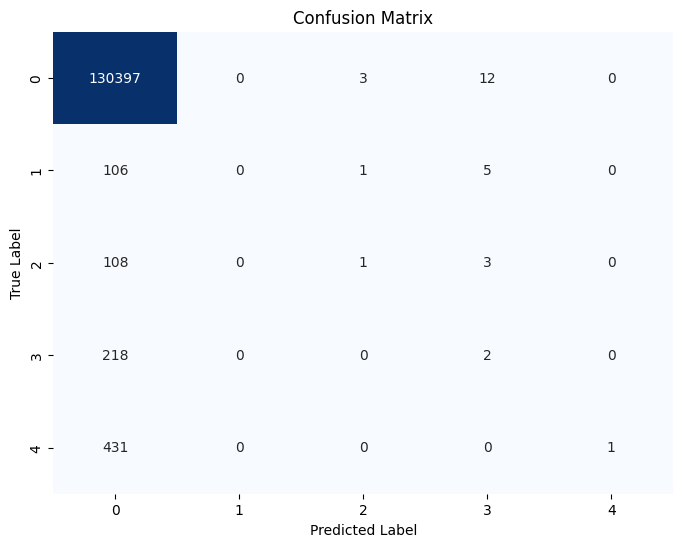

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [0]:
#regularization
from sklearn.linear_model import LogisticRegression

# Add regularization parameter (e.g., C) to LogisticRegression
logistic_regression = LogisticRegression(C=0.1, max_iter=100)
logistic_regression.fit(X_train, y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [0]:
y_pred = logistic_regression.predict(X_val)

In [0]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9932362439826945


In [0]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
# grid_search = GridSearchCV(LogisticRegression(max_iter=100), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

# Decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Prepare data
X = merged_df.drop(columns=['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days', 'TotalFailures','NAME','REPDTE'])
y = merged_df['TotalFailures']

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9917357260374139


In [0]:
#Decision Tree

In [0]:
merged_df=pd.read_csv("E:\CDAC\BANK_DATASET_PROJECT\df_merged_final.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\DELL\AppData\Local\Temp\ipykernel_14084\1334322659.py:1: SyntaxWarning: invalid escape sequence '\C'
  merged_df=pd.read_csv("E:\CDAC\BANK_DATASET_PROJECT\df_merged_final.csv")


In [0]:
lower_date = pd.to_datetime(merged_df['REPDTE'][int(merged_df.shape[0]*0.70)])
top_date = pd.to_datetime(merged_df['REPDTE'][int(merged_df.shape[0]*0.85)])
last_date = pd.to_datetime(merged_df['REPDTE'].iloc[-1])
print(top_date)
print(lower_date)
print(last_date)
top_date= top_date.strftime('%Y-%m-%d')
lower_date=lower_date.strftime('%Y-%m-%d')
last_date=last_date.strftime('%Y-%m-%d')
print(top_date)
print(lower_date)
print(last_date)

2018-09-30 00:00:00
2014-09-30 00:00:00
2023-06-30 00:00:00
2018-09-30
2014-09-30
2023-06-30


In [0]:
train_data = merged_df[merged_df['REPDTE'] < lower_date]
validation_data = merged_df[(merged_df['REPDTE'] >= lower_date) & (merged_df['REPDTE'] < top_date)]
test_data = merged_df[(merged_df['REPDTE'] >= top_date) & (merged_df['REPDTE'] < last_date)]
last_data = merged_df[merged_df['REPDTE'] == last_date] 

#droping date column
train_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
validation_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
test_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)



last_data = last_data.reset_index(drop=True)

last_data_ids = last_data[['NAME','CERT']].copy()
last_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14084\2483500588.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14084\2483500588.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14084\2483500588.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [0]:
Y1t = train_data['FailWithin90Days']
Y2t = train_data['FailWithin180Days']
Y3t = train_data['FailWithin365Days']
Y4t = train_data['FailWithin730Days']
Y1v = validation_data['FailWithin90Days']
Y2v = validation_data['FailWithin180Days']
Y3v = validation_data['FailWithin365Days']
Y4v = validation_data['FailWithin730Days']
Y1s = test_data['FailWithin90Days']
Y2s = test_data['FailWithin180Days']
Y3s = test_data['FailWithin365Days']
Y4s = test_data['FailWithin730Days']
Y1ld = last_data['FailWithin90Days']
Y2ld = last_data['FailWithin180Days']
Y3ld = last_data['FailWithin365Days']
Y4ld = last_data['FailWithin730Days']


In [0]:
Y_train = np.column_stack((Y1t, Y2t, Y3t,Y4t))
#train_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days'], axis=1, inplace=True)#drop also totalfailure column
Y_val = np.column_stack((Y1v, Y2v, Y3v,Y4v))
#validation_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days'], axis=1, inplace=True)
Y_test = np.column_stack((Y1s, Y2s, Y3s,Y4s))
#test_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days'], axis=1, inplace=True)
lastdata = np.column_stack((Y1ld, Y2ld, Y3ld,Y4ld))
#last_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days'], axis=1, inplace=True)

In [0]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Drop 'FailWithin' columns from train_data
train_data = train_data.drop(columns=['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days','TotalFailures'])

# Drop 'FailWithin' columns from validation_data
validation_data = validation_data.drop(columns=['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days','TotalFailures'])

# Drop 'FailWithin' columns from test_data
test_data = test_data.drop(columns=['FailWithin90Days', 'FailWithin180Days', 'FailWithin365Days', 'FailWithin730Days','TotalFailures'])

# Define the model with optional hyperparameters
decision_tree = DecisionTreeClassifier()

# Fit the model
decision_tree.fit(train_data, Y_train[:, 1])

# Make predictions
y_pred_decision_tree = decision_tree.predict(validation_data)

# Calculate evaluation metrics
f1_scores_decision_tree = f1_score(Y_val[:, 1], y_pred_decision_tree)
auc_decision_tree = roc_auc_score(Y_val[:, 1], y_pred_decision_tree)

print(f'AUC (Decision Tree): {auc_decision_tree}')
print(f'F1 Score (Decision Tree): {f1_scores_decision_tree}')

AUC (Decision Tree): 0.6736213192344408
F1 Score (Decision Tree): 0.2689075630252101


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross-Validation to find the best hyperparameters
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_data, Y_train[:, 1])

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(train_data, Y_train[:, 1])

# Make predictions on the validation set
y_pred_decision_tree = best_decision_tree.predict(validation_data)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_val[:, 1], y_pred_decision_tree)
auc = roc_auc_score(Y_val[:, 1], y_pred_decision_tree)
f1 = f1_score(Y_val[:, 1], y_pred_decision_tree)

print(f'Accuracy (Decision Tree): {accuracy}')
print(f'AUC (Decision Tree): {auc}')
print(f'F1 Score (Decision Tree): {f1}')